# Loading the libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# split the data into train and test
from sklearn.model_selection import train_test_split

# to scale the data 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# to do PCA 
from sklearn.decomposition import PCA

# for one hot encoding
from sklearn.preprocessing import OneHotEncoder

# for imputation
from sklearn.impute import SimpleImputer, KNNImputer

# for building models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

# for metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)


# for cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# To tune a model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To supress the warning messages generated
import warnings

# Loading the data and getting some basic understanding of the data

In [2]:
data = pd.read_csv('data_cardiovascular_risk.csv')
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
data.shape   #shape is the attribute of the dataframe and not a function/method, hence no parantheses ()

(3390, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [5]:
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [6]:
# 5 number summary for each of the numerical columns
data.describe().T   # .T will just give the transpose of the dataframe, easier to view

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


# Id serves no purpose for any of our analysis, so dropping the id column

In [7]:
data = data.drop('id', axis = 1)
data
# axis = 1 to drop columns, axis = 0 to drop rows
# default is axis = 0

# need to provide a list if you want drop more than one column
# example:
#data = data.drop(['id','TenYearCHD'], axis = 1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


## Data is not perfect

# Null Value Treatment

## We need to use different kinds of imputation for numerical and categorical columns

In [8]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

## You should be careful not to do imputation for Target variable(s)

In [9]:
numeric_columns.remove('TenYearCHD')

In [10]:
numeric_columns

['age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [11]:
data[numeric_columns].shape

(3390, 13)

In [12]:
categorical_columns = data.select_dtypes(include=object).columns.tolist()
categorical_columns

['sex', 'is_smoking']

In [13]:
data[categorical_columns].shape

(3390, 2)

In [14]:
data['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [15]:
data['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [16]:
data[categorical_columns].value_counts()

sex  is_smoking
F    NO            1147
M    YES            911
F    YES            776
M    NO             556
dtype: int64

In [17]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

In [18]:
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode())

In [19]:
data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [20]:
data.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


# Other Methods for treating NULL values

1. Dropping the Rows/Columns containing the null values

In [21]:
# Drop all rows containing null values
#data = data.dropna()

# Drop columns containing null values
#data = data.dropna(axis = 1)

# by default the axis is 0

# you can choose to drop the rows containing nulls in only particular columns
# data = data.dropna(subset=['TenYearCHD','glucose'])

If there are large number of nulls in a particular column, it is better to drop that column rather than dropping the rows associated with the nulls in that column

What does Large mean?

It DEPENDS!! on the dataset

Also Calls for your judgement

2. KNN Imputation

In [22]:
# Create the KNN imputer
#imputer = KNNImputer(n_neighbors=3)

#imputed_data = imputer.fit_transform(data)

#imputed_data = pd.DataFrame(imputed_data, columns=data.columns)

# Drop duplicate rows if any

In [23]:
data.shape

(3390, 16)

In [24]:
data = data.drop_duplicates(keep='first')
data.shape

(3390, 16)

## Exploratory Data Analysis

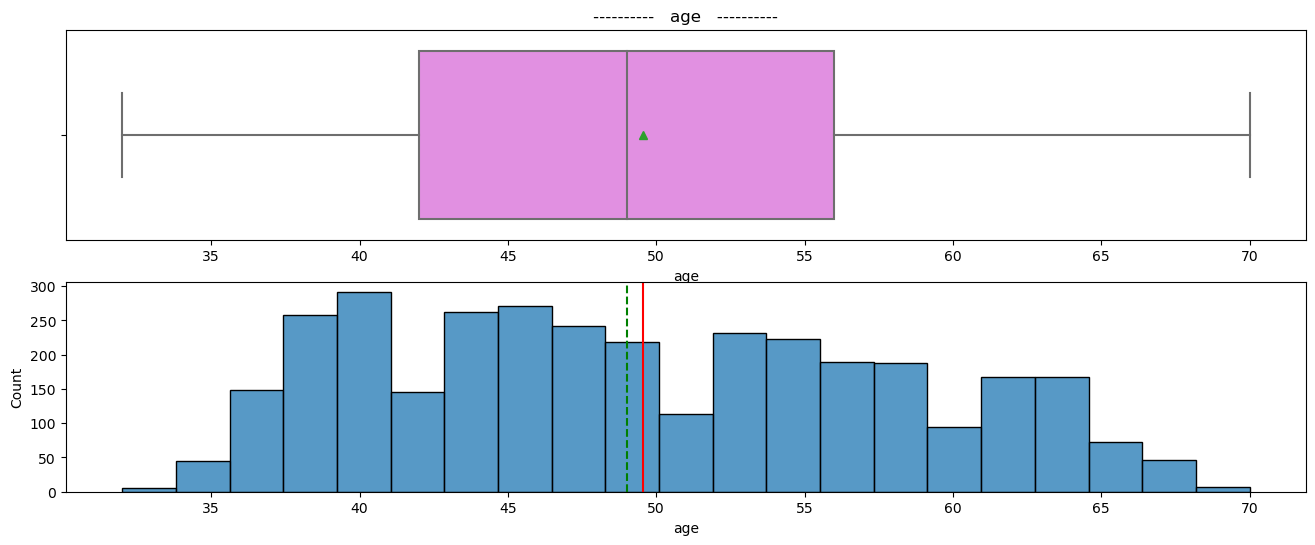

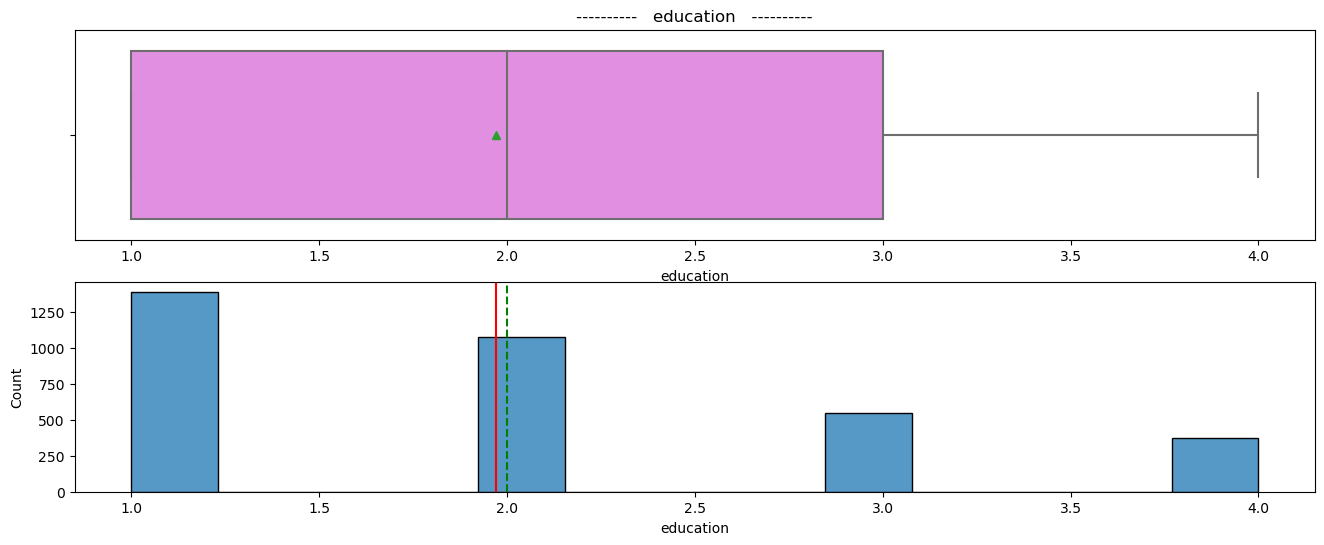

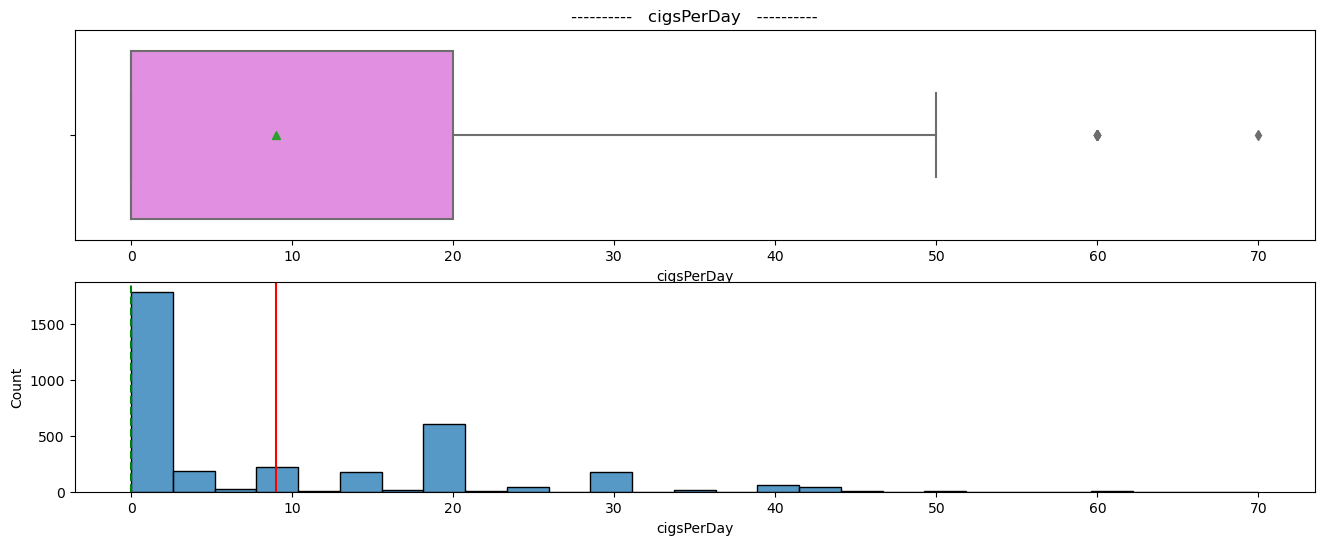

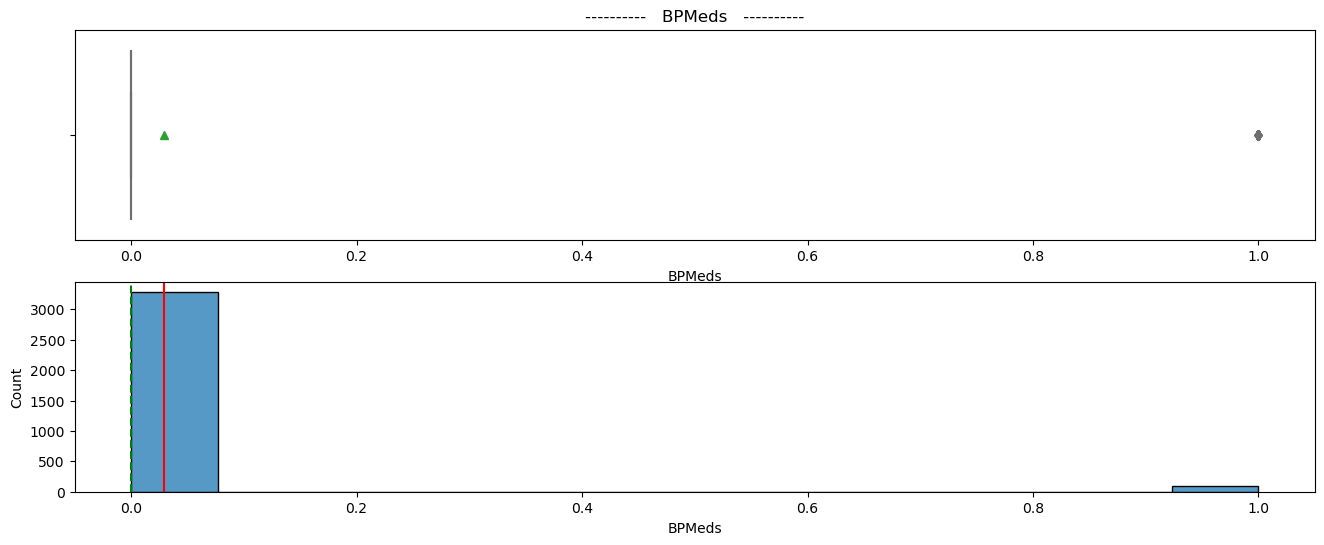

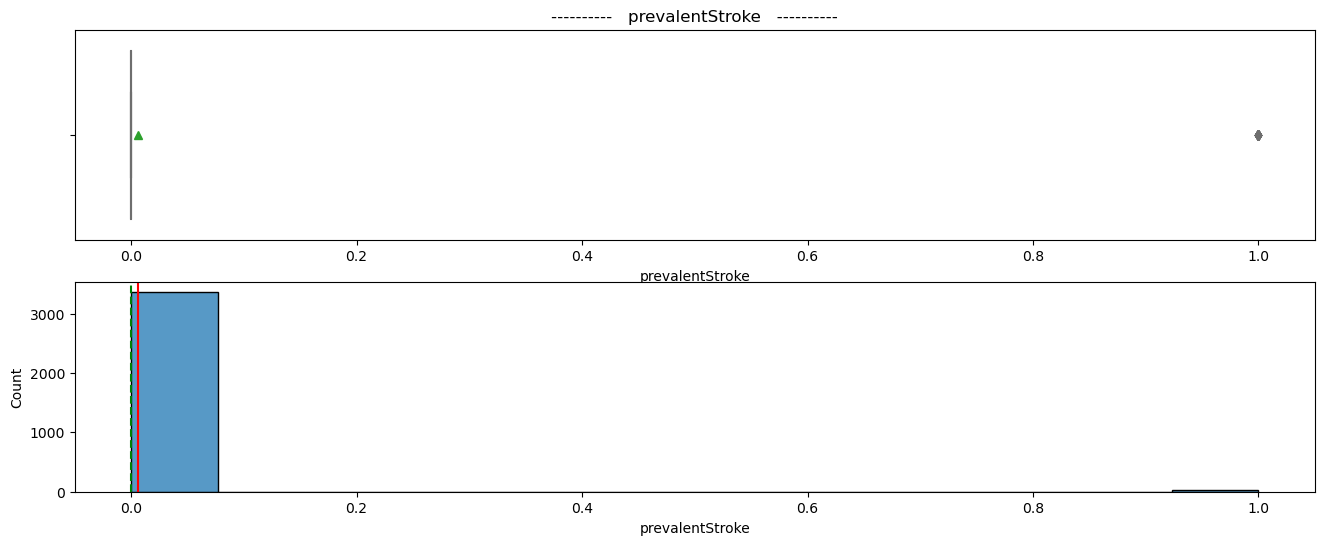

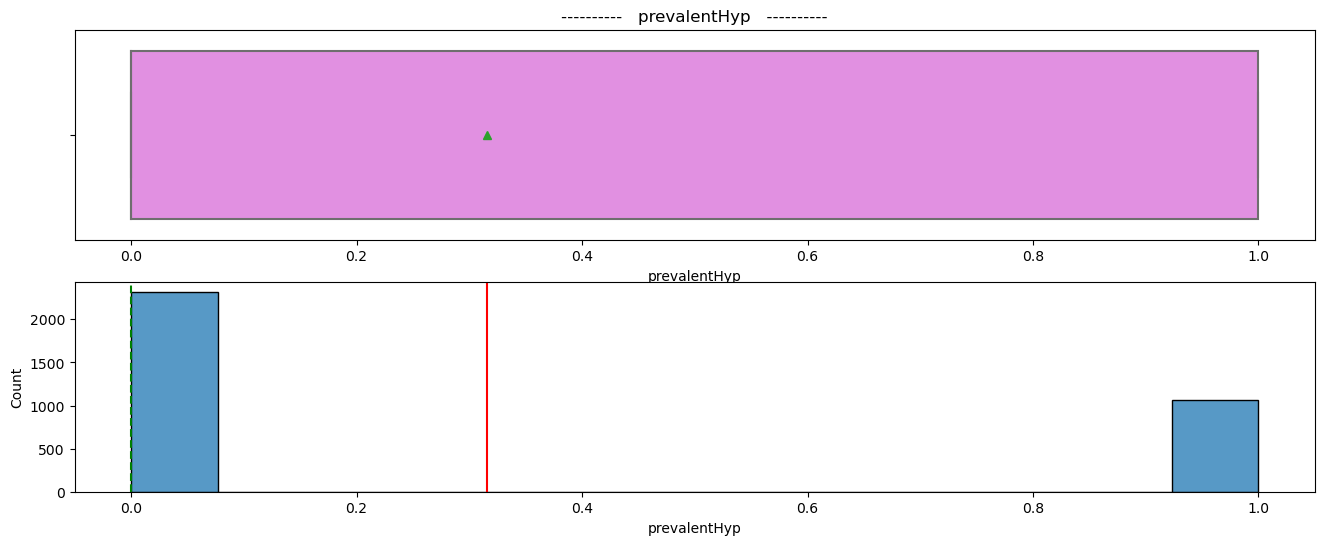

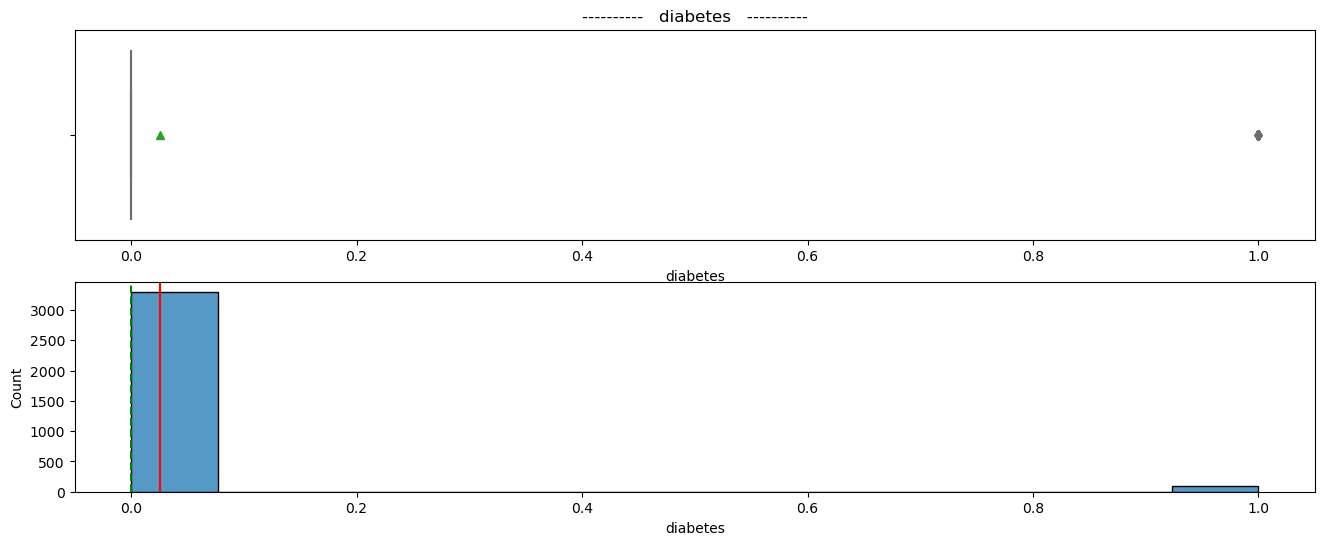

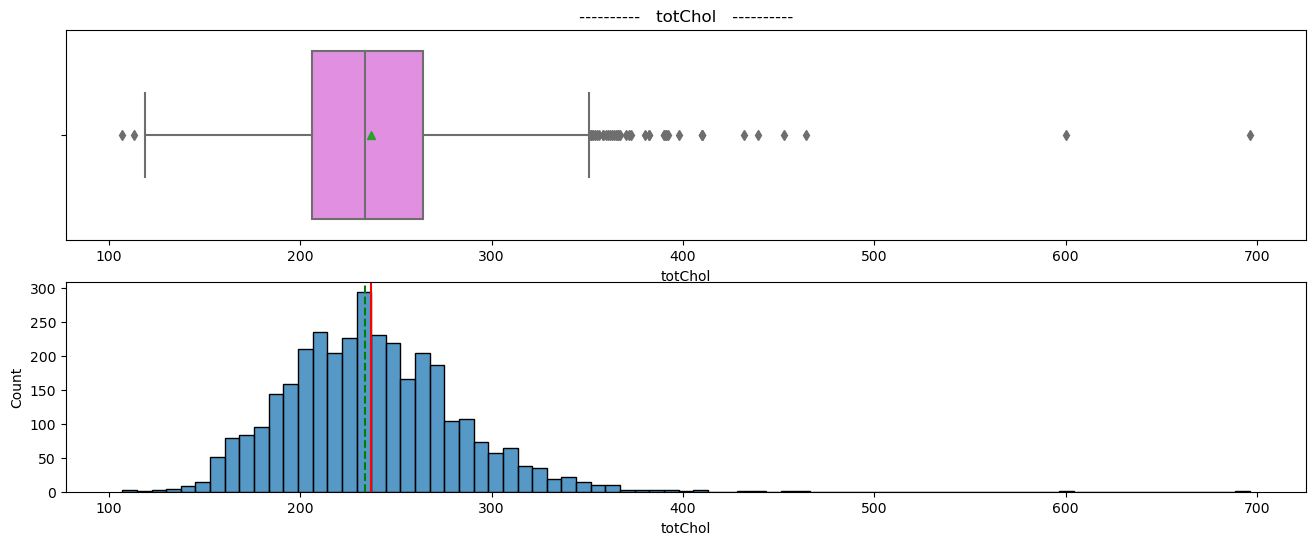

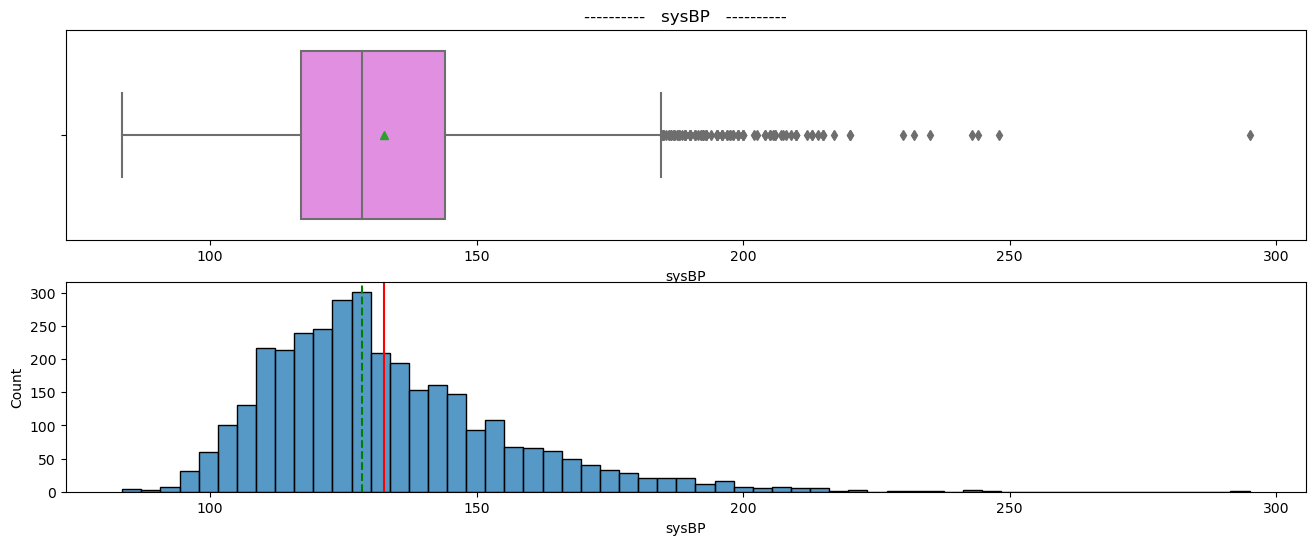

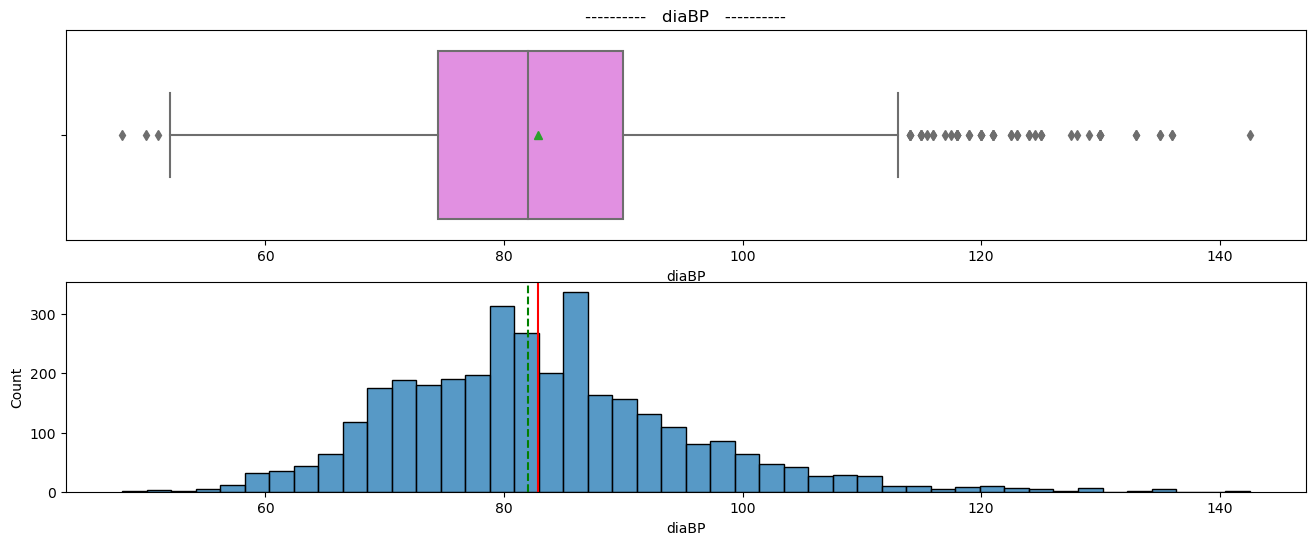

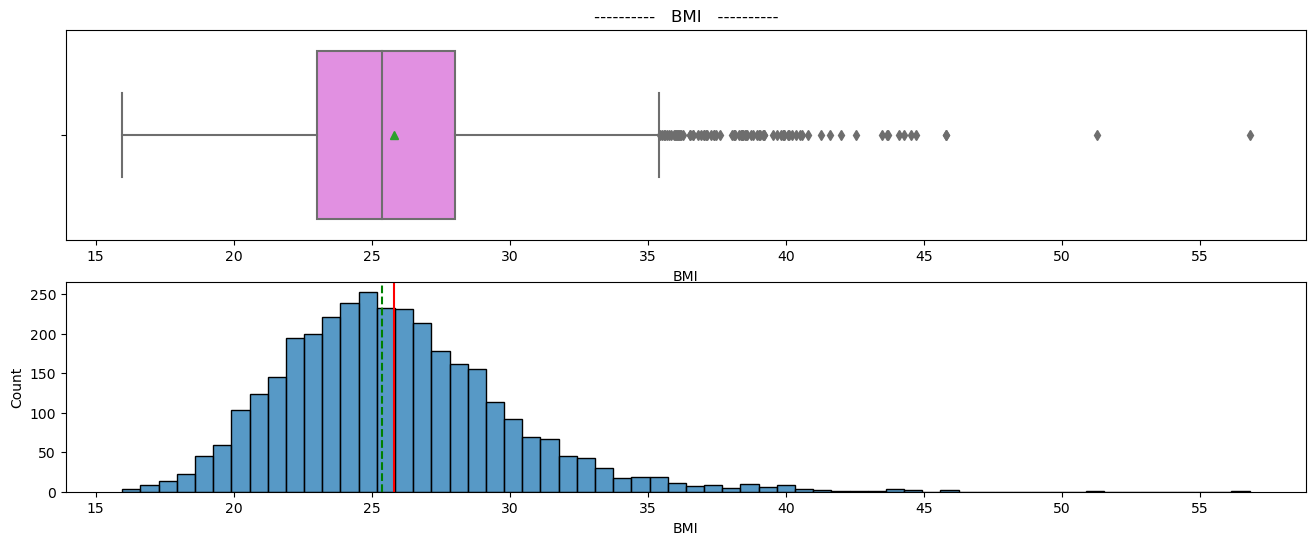

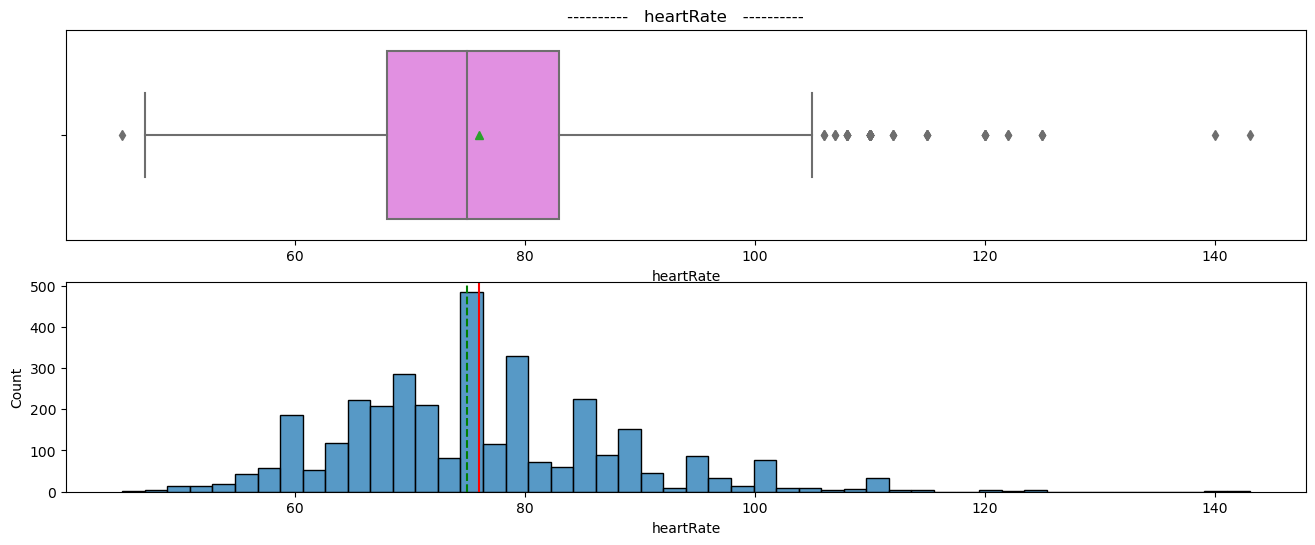

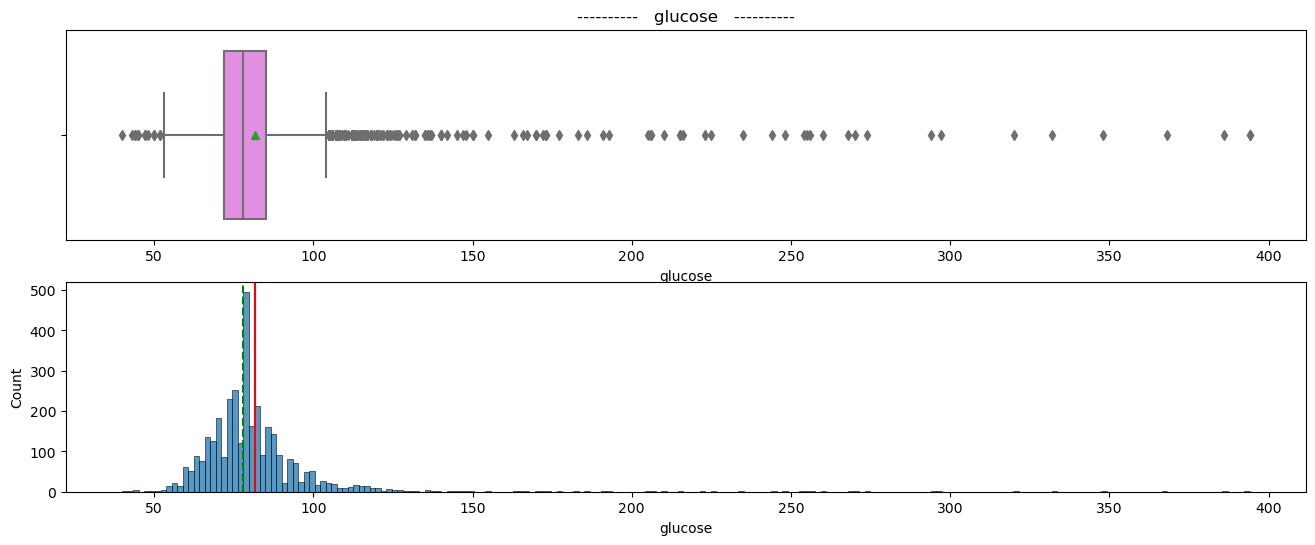

In [25]:
for col in numeric_columns:
    plt.figure(figsize=(16, 6))
    plt.subplot(2, 1, 1)
    plt.title("----------   " + col + "   ----------")
    sns.boxplot(data=data, x=col, showmeans=True, color="violet")
    plt.subplot(2, 1, 2)
    sns.histplot(data=data, x=col)
    plt.axvline(data[col].mean(), color="red", linestyle="-")
    plt.axvline(data[col].median(), color="green", linestyle="--")
    print('\n')
    plt.show()

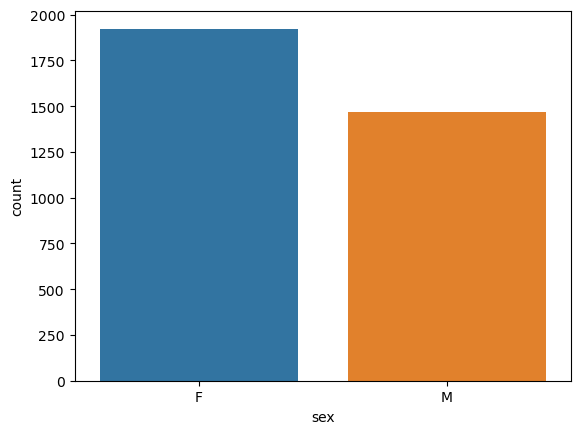

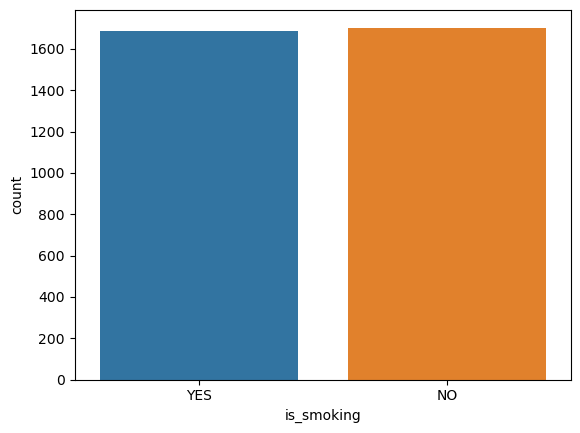

In [26]:
for col in categorical_columns:
    sns.countplot(data=data[categorical_columns], x=col)
    plt.show()
    print('\n')

## Bivariate Analyses

In [27]:
data[numeric_columns].corr()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.170171,-0.191465,0.122114,0.059038,0.308826,0.107875,0.271961,0.404845,0.221896,0.137478,-0.002636,0.112395
education,-0.170171,1.000000,0.010460,-0.019359,-0.034250,-0.083778,-0.051073,-0.020029,-0.135802,-0.060180,-0.131462,-0.046664,-0.037524
cigsPerDay,-0.191465,0.010460,1.000000,-0.035727,-0.041576,-0.078003,-0.048114,-0.025346,-0.100348,-0.068320,-0.099830,0.066229,-0.066374
BPMeds,0.122114,-0.019359,-0.035727,1.000000,0.116183,0.256892,0.070932,0.080918,0.260384,0.198780,0.087648,0.018107,0.061356
prevalentStroke,0.059038,-0.034250,-0.041576,0.116183,1.000000,0.071652,0.010115,-0.010769,0.057568,0.047235,0.017032,-0.019183,0.023662
prevalentHyp,0.308826,-0.083778,-0.078003,0.256892,0.071652,1.000000,0.082565,0.158693,0.699285,0.612897,0.299615,0.150731,0.082962
diabetes,0.107875,-0.051073,-0.048114,0.070932,0.010115,0.082565,1.000000,0.059194,0.124011,0.061165,0.087793,0.039746,0.609743
totChol,0.271961,-0.020029,-0.025346,0.080918,-0.010769,0.158693,0.059194,1.000000,0.197848,0.153825,0.113452,0.086955,0.060913
sysBP,0.404845,-0.135802,-0.100348,0.260384,0.057568,0.699285,0.124011,0.197848,1.000000,0.781908,0.331730,0.178135,0.137832
diaBP,0.221896,-0.060180,-0.068320,0.198780,0.047235,0.612897,0.061165,0.153825,0.781908,1.000000,0.379684,0.174908,0.069097


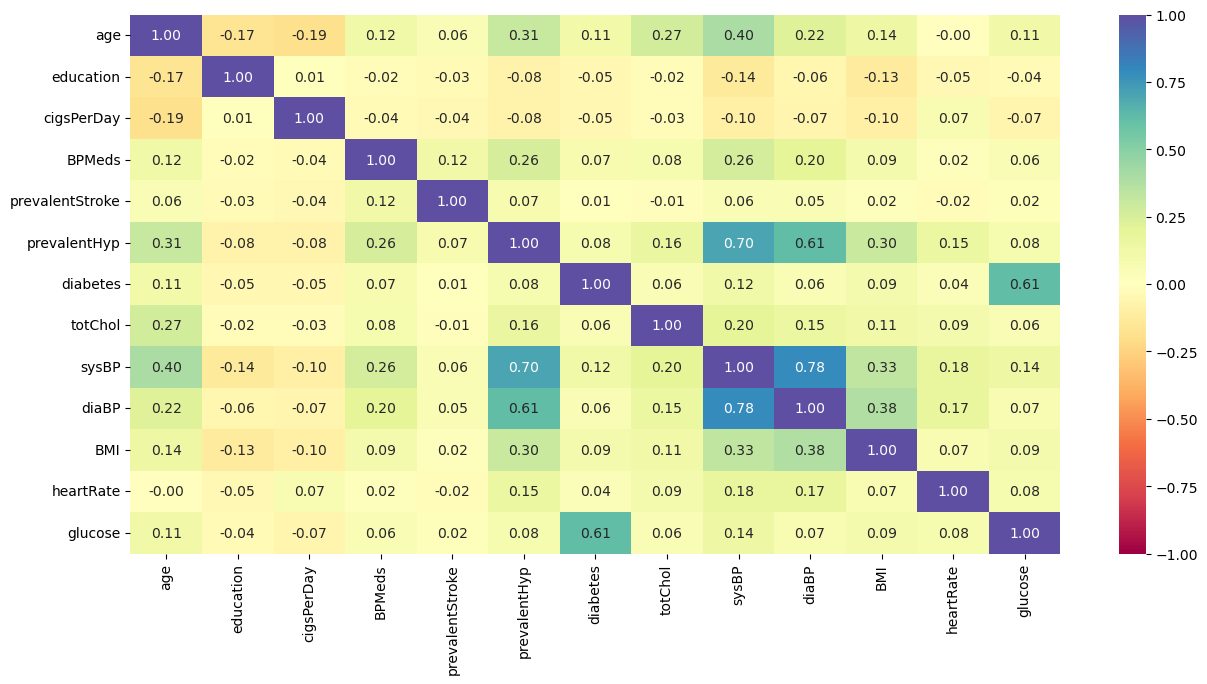

In [28]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## OUTLIER Treatment

In [29]:
data[data['totChol'] > 500]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
423,52,2.0,F,NO,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
512,51,2.0,M,YES,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


In [30]:
rows_drop = data[data['totChol'] > 500].index

In [31]:
data = data.drop(rows_drop)

In [32]:
data[data['totChol'] > 500]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### You can try doing that for outliers in other columns

## We need to do Encoding for Categorical columns since most of the models work with only numerical data

In [33]:
# Using get_dummies method
data = pd.get_dummies(
    data,
    columns= ['sex','is_smoking'],
    drop_first=True,
)
data.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0,1
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,1
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,1


### Other methods: OneHotEncoder
### it will produce a numpy array
### need to convert it back to a dataframe to continue

## Standardisation or Normalisation

In [34]:
#defining X(independent) and Y(Dependent) Variables
X = data.drop(["TenYearCHD"], axis=1)
y = data["TenYearCHD"]

In [35]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_M,is_smoking_YES
0,0.842105,0.333333,0.042857,0.0,0.0,0.0,0.0,0.319328,0.304965,0.391534,0.230656,0.459184,0.112994,0.0,1.0
1,0.105263,1.000000,0.000000,0.0,0.0,1.0,0.0,0.294118,0.399527,0.529101,0.338149,0.275510,0.098870,1.0,0.0
2,0.368421,0.000000,0.142857,0.0,0.0,0.0,0.0,0.400560,0.153664,0.243386,0.107493,0.438776,0.152542,0.0,1.0
3,0.473684,0.000000,0.285714,0.0,0.0,1.0,0.0,0.352941,0.352246,0.423280,0.301175,0.234694,0.152542,1.0,1.0
4,0.842105,0.000000,0.428571,0.0,0.0,0.0,0.0,0.375350,0.250591,0.391534,0.256121,0.255102,0.104520,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,0.736842,0.000000,0.000000,0.0,0.0,0.0,0.0,0.431373,0.189125,0.328042,0.326151,0.255102,0.177966,0.0,0.0
3384,0.368421,0.000000,0.000000,0.0,0.0,0.0,0.0,0.257703,0.087470,0.084656,0.146915,0.357143,0.124294,0.0,0.0
3385,0.315789,0.666667,0.042857,0.0,0.0,1.0,0.0,0.686275,0.380615,0.751323,0.317336,0.285714,0.090395,1.0,1.0
3386,0.736842,0.000000,0.000000,0.0,0.0,1.0,0.0,0.235294,0.394799,0.603175,0.172625,0.357143,0.127119,1.0,0.0


# fit_transform vs transform

## Log Transformation

### If there are 0's in your column to be log transformed, it will create some errors/problems (log 0 problem)
### you can add a small constant to the column such as 0.00001 to avoid this

In [36]:
X_norm['glucose'] = X_norm['glucose'] + 0.00001

In [37]:
X_norm['glucose'] = np.log(X_norm['glucose'])
X_norm['glucose']

0      -2.180329
1      -2.313848
2      -1.880247
3      -1.880247
4      -2.258283
          ...   
3383   -1.726106
3384   -2.085027
3385   -2.403450
3386   -2.062556
3387   -1.917985
Name: glucose, Length: 3388, dtype: float64

## Splitting the Data between Testing and Training

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=7, stratify = y)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2710
Number of rows in test data = 678


## It is important to stratify the data based on target variable. 
## X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify = y)
## In this command the parameter   'stratify = y'   will stratify the dataset based on the y variable. This is particularly important if the target variable is imbalanced

## The random_state = 7 is a seed so that when you run the program many times (number of experiments) division of data into train and test does not vary ie in each experiment same rows go into training data/testing data. This is important for consistency in different experiments and comparing the results

In [39]:
y.value_counts()

0    2878
1     510
Name: TenYearCHD, dtype: int64

In [40]:
print(f'Percentage of people with 10-year risk of coronary heart disease in this dataset: {511/data.shape[0]}')

Percentage of people with 10-year risk of coronary heart disease in this dataset: 0.15082644628099173


This dataset is somewhat imabalanced

In [41]:
y_train.value_counts()

0    2302
1     408
Name: TenYearCHD, dtype: int64

In [42]:
print(f'Percentage of people with 10-year risk of coronary heart disease in train set: {358/X_train.shape[0]}')

Percentage of people with 10-year risk of coronary heart disease in train set: 0.13210332103321032


In [43]:
y_test.value_counts()

0    576
1    102
Name: TenYearCHD, dtype: int64

In [44]:
print(f'Percentage of people with 10-year risk of coronary heart disease in test set: {153/X_test.shape[0]}')

Percentage of people with 10-year risk of coronary heart disease in test set: 0.22566371681415928


# BUILDING THE MODELS

## 1. Logistic Regression

In [45]:
logistic = LogisticRegression(max_iter = 5000)

In [46]:
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [47]:
logistic.score(X_train,y_train)   #gives training accuracy

0.8575645756457565

In [48]:
predicted_l = logistic.predict(X_train)

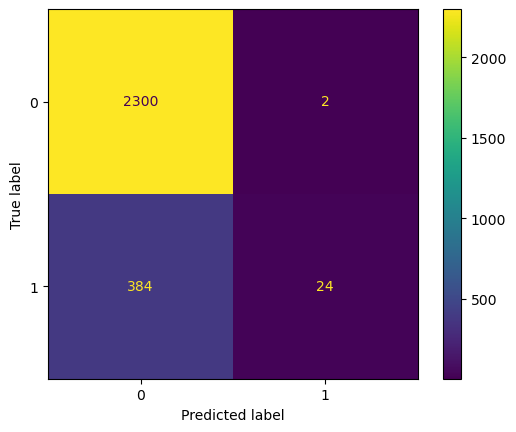

In [49]:
ConfusionMatrixDisplay(confusion_matrix(y_train, predicted_l)).plot()

### Accuracy is not always a good indicator --- WHY?

In [50]:
print(classification_report(y_train, predicted_l))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2302
           1       0.92      0.06      0.11       408

    accuracy                           0.86      2710
   macro avg       0.89      0.53      0.52      2710
weighted avg       0.87      0.86      0.80      2710



In [51]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
cross_val_score(logistic, X_train, y_train, cv=cv, scoring='f1',)

array([0.09411765, 0.07058824, 0.15555556, 0.07058824, 0.11235955])

In [52]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
cross_val_score(logistic, X_train, y_train, cv=cv, scoring='roc_auc',)

array([0.76173643, 0.68600198, 0.72515907, 0.65241251, 0.71375928])

# If you want to visualise the ROC Curve

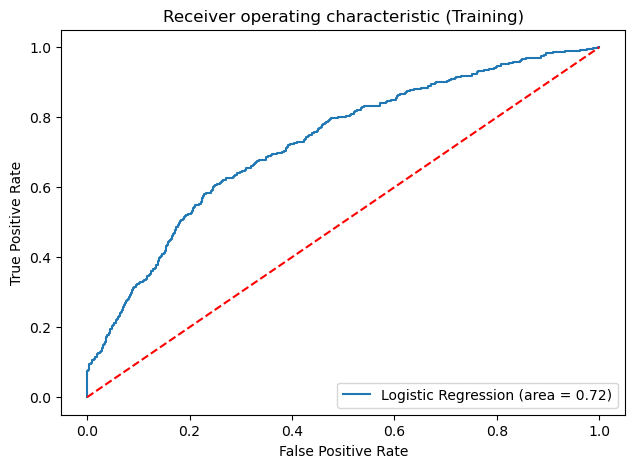

In [53]:
# ROC curve
logistic_roc_auc_train = roc_auc_score(y_train, logistic.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, logistic.predict_proba(X_train)[:,1])

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logistic_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (Training)")
plt.legend(loc="lower right")
#plt.show()

## To change the thresholds

In [54]:
# Predict probabilities on the train and test sets
pred_prob = logistic.predict_proba(X_train)[:, 1]
pred_prob_test = logistic.predict_proba(X_test)[:, 1]  # since 1 is the positive class

# Calculate ROC AUC
roc_auc = roc_auc_score(y_train, pred_prob)

# Find the optimal threshold for ROC AUC
fpr, tpr, thresholds = roc_curve(y_train, pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Use the optimal threshold for predictions
y_pred_train_l = [1 if prob >= optimal_threshold else 0 for prob in pred_prob]
y_pred_test_l = [1 if prob >= optimal_threshold else 0 for prob in pred_prob_test]

# Print the ROC AUC and the optimal threshold
print("ROC AUC:", roc_auc)
print("Optimal Threshold based on ROC AUC:", optimal_threshold)

ROC AUC: 0.724619256912148
Optimal Threshold based on ROC AUC: 0.18184736254707837


In [55]:
print(classification_report(y_train, y_pred_train_l))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2302
           1       0.30      0.61      0.40       408

    accuracy                           0.73      2710
   macro avg       0.61      0.68      0.61      2710
weighted avg       0.82      0.73      0.76      2710



In [56]:
print(classification_report(y_test, y_pred_test_l))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       576
           1       0.30      0.54      0.38       102

    accuracy                           0.74       678
   macro avg       0.60      0.66      0.61       678
weighted avg       0.81      0.74      0.77       678



## Another way of building a Logistic Regression Model using statsmodels library which gives a nicer output

In [57]:
# Need to add a constant term to the indepdent variables 
# This is specific to the statsmodel library to calculate the intercept when using Linear and Logistic Regression Models

#X = sm.add_constant(X)

In [58]:
#X.head()

In [59]:
# Redoing this since X has changed
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify = y)
#print("Number of rows in train data =", X_train.shape[0])
#print("Number of rows in test data =", X_test.shape[0])

In [60]:
#logreg = sm.Logit(y_train, X_train).fit()
#print(logreg.summary())

In [61]:
#predicted = logreg.predict(X_test)

## 2. K-Nearest Neighbour (KNN) Model

In [62]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [63]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [64]:
knn.score(X_train,y_train) 

/Users/harishbhupalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8590405904059041

In [65]:
predicted_knn = knn.predict(X_train)

/Users/harishbhupalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


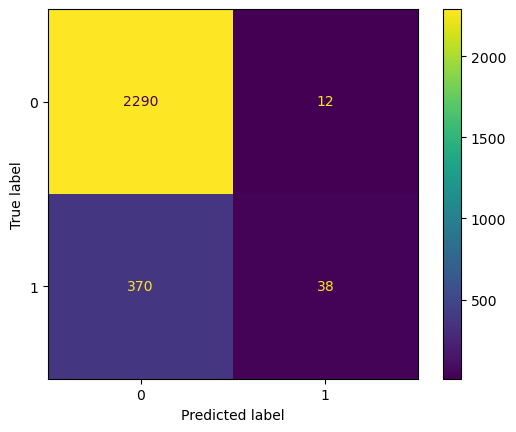

In [66]:
ConfusionMatrixDisplay(confusion_matrix(y_train, predicted_knn)).plot()

In [67]:
print(classification_report(y_train, predicted_knn))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2302
           1       0.76      0.09      0.17       408

    accuracy                           0.86      2710
   macro avg       0.81      0.54      0.54      2710
weighted avg       0.85      0.86      0.81      2710



In [69]:
# To ignore the warnings generated in KNN related processings 
warnings.filterwarnings("ignore")

In [70]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
cross_val_score(knn, X_train, y_train, cv=cv, scoring='f1',)

array([0.04301075, 0.06593407, 0.02083333, 0.02197802, 0.06451613])

## Model Tuning
### Using Grid Search Technique

In [71]:
parameters = {"n_neighbors": np.arange(2, 10),}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#To use stratified K-fold cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

knn_grid = GridSearchCV(KNeighborsClassifier(), parameters, scoring=scorer, cv=cv, n_jobs= -1).fit(X_train, y_train)

params = knn_grid.best_params_
params

/Users/harishbhupalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/harishbhupalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

{'n_neighbors': 3}

In [72]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
cross_val_score(knn_grid, X_train, y_train, cv=cv, scoring='f1',)

/Users/harishbhupalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/harishbhupalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

array([0.08421053, 0.12727273, 0.1322314 , 0.12389381, 0.11864407])

In [73]:
predicted_train_knn = knn_grid.predict(X_train)

In [74]:
print(classification_report(y_train, predicted_train_knn))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2302
           1       0.67      0.32      0.44       408

    accuracy                           0.87      2710
   macro avg       0.78      0.65      0.68      2710
weighted avg       0.86      0.87      0.86      2710



In [75]:
predicted_test_knn = knn_grid.predict(X_test)

In [76]:
print(classification_report(y_test, predicted_test_knn))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       576
           1       0.22      0.11      0.15       102

    accuracy                           0.81       678
   macro avg       0.54      0.52      0.52       678
weighted avg       0.76      0.81      0.78       678



## 3. Decision Tree Classifier

In [77]:
tree = DecisionTreeClassifier(random_state=7)

In [78]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [79]:
tree.score(X_train,y_train) 

1.0

In [80]:
tree.get_depth()

27

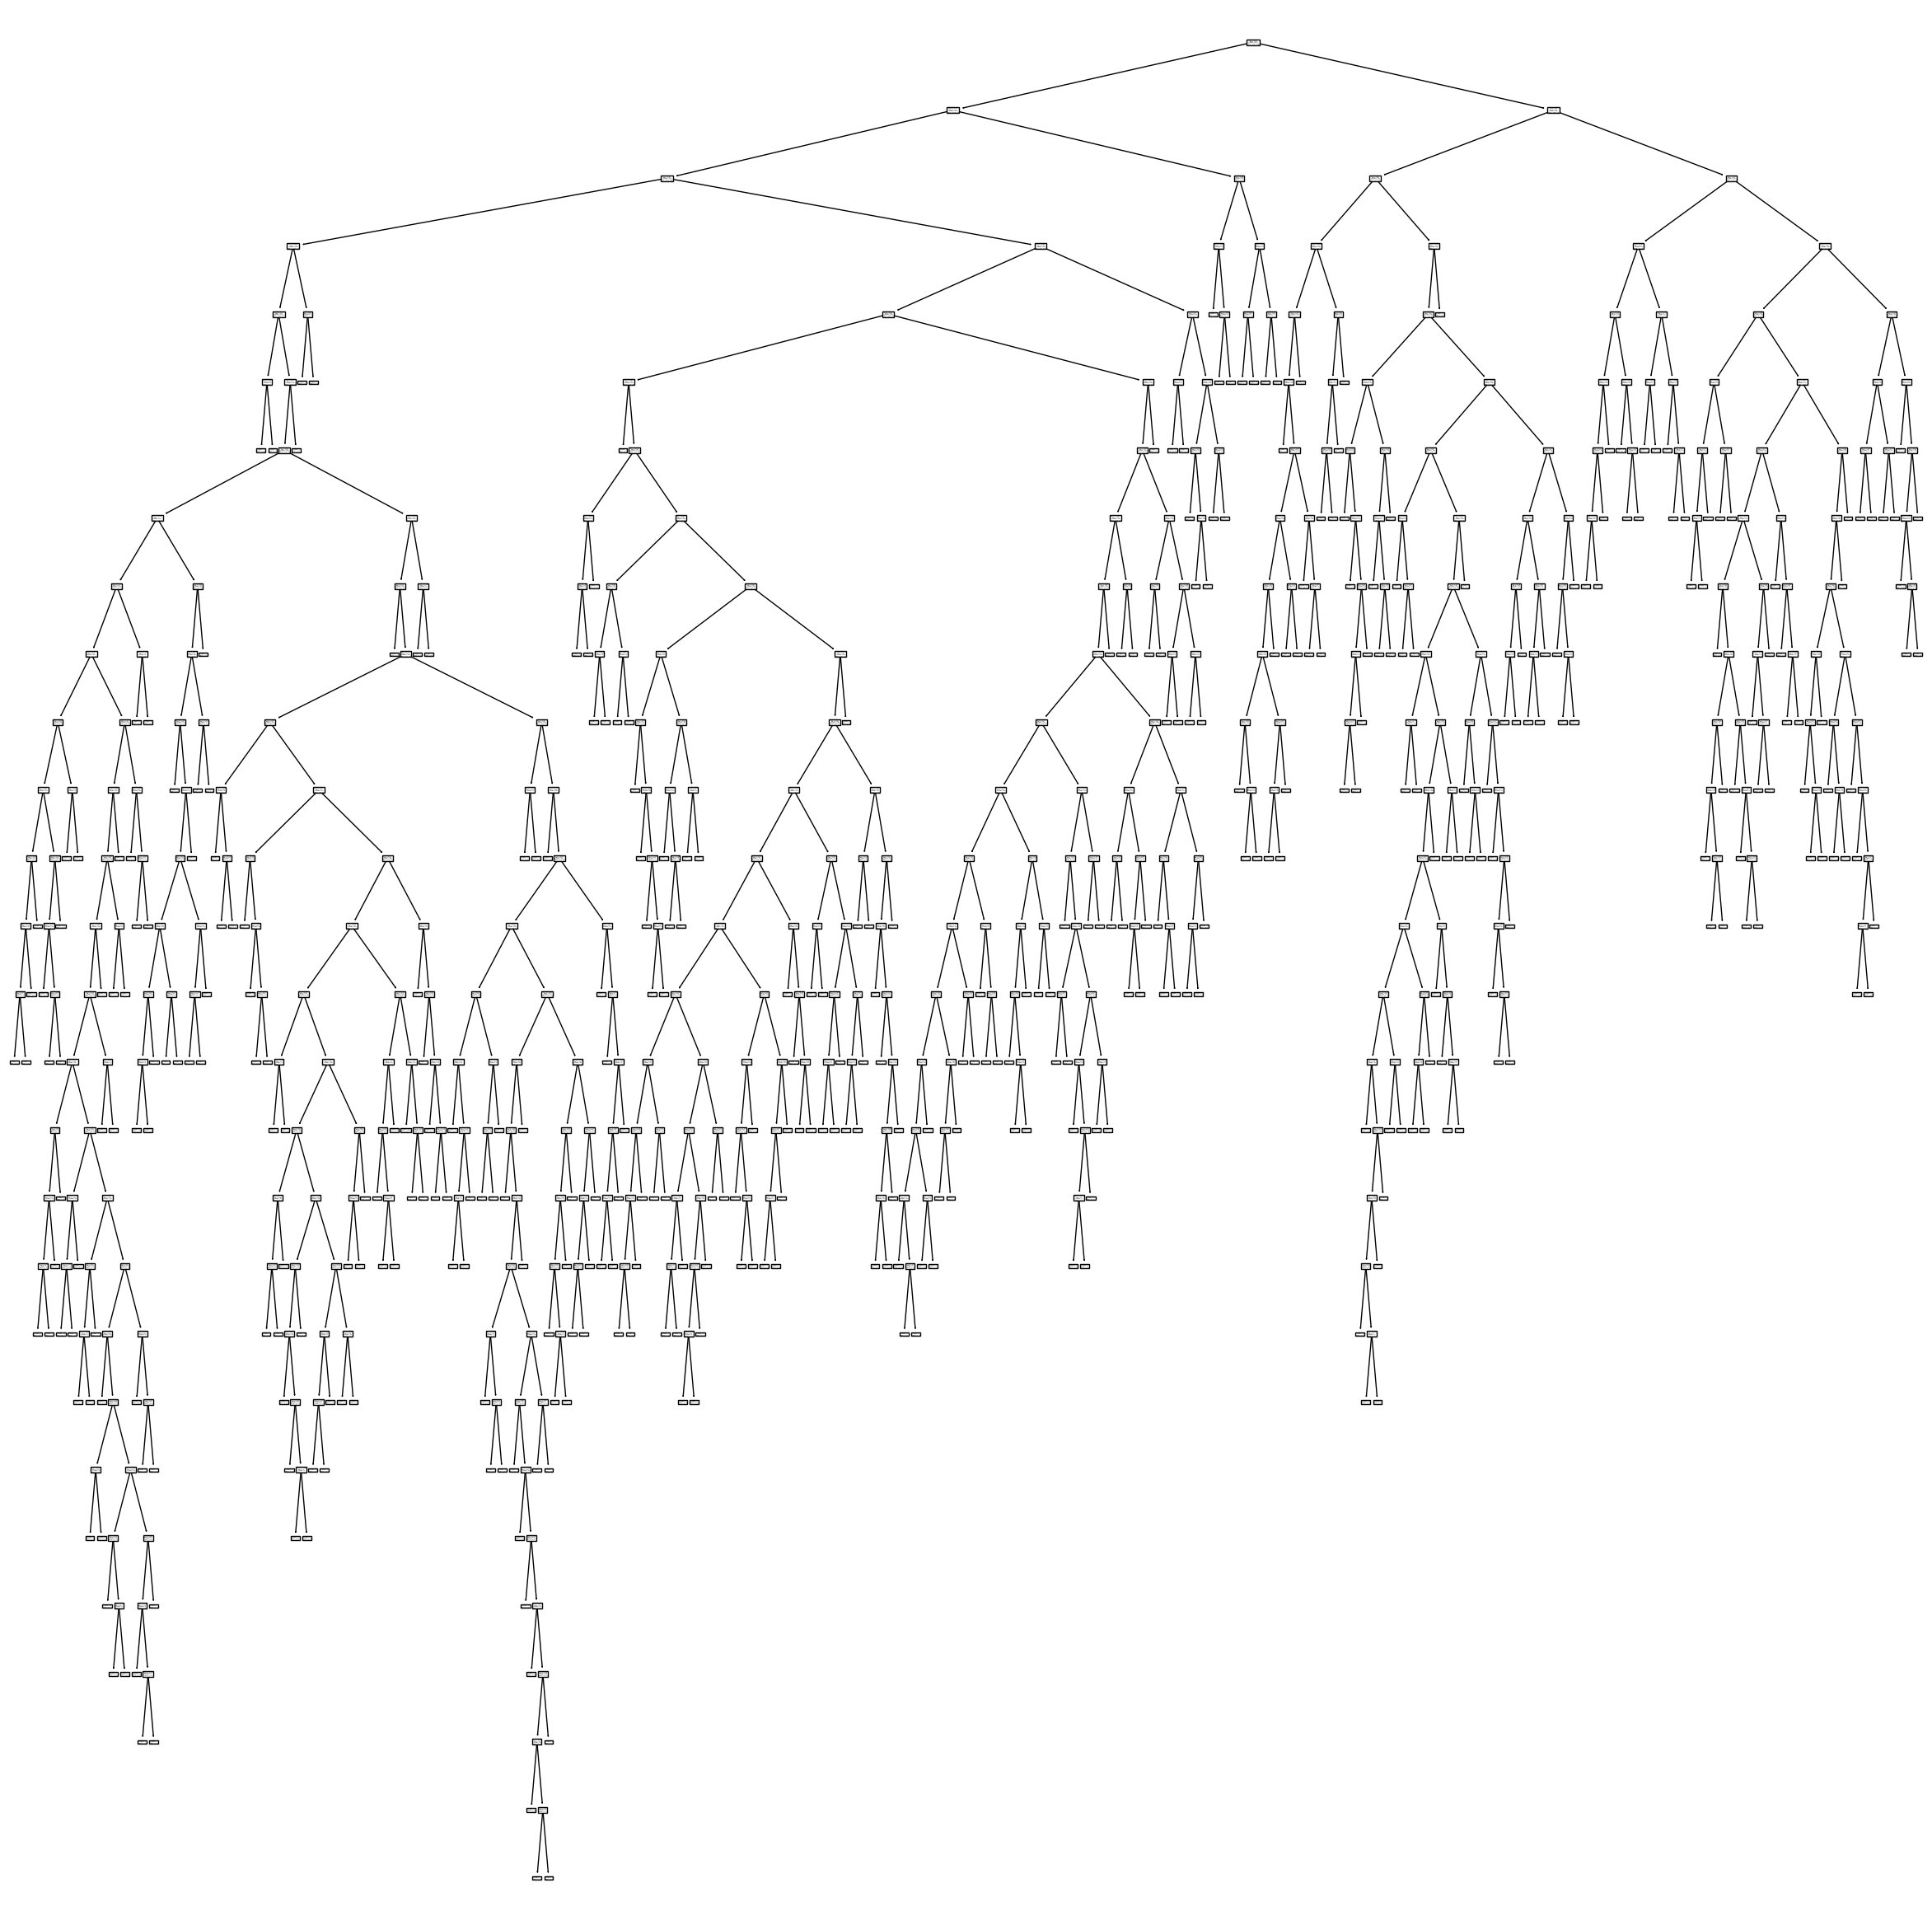

In [81]:
plt.figure(figsize=(30, 30))
plot_tree(tree)
plt.show()

In [82]:
predicted = tree.predict(X_train)

In [83]:
print(classification_report(y_train, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2302
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2710
   macro avg       1.00      1.00      1.00      2710
weighted avg       1.00      1.00      1.00      2710



In [84]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
cross_val_score(tree, X_train, y_train, cv=cv, scoring='f1',)

array([0.25698324, 0.21118012, 0.30456853, 0.2755102 , 0.29508197])

### Model Tuning

In [85]:
parameters = {"max_depth": np.arange(2, 25),}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#To use stratified K-fold cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

tree_grid = GridSearchCV(DecisionTreeClassifier(), parameters, scoring=scorer, cv=5, n_jobs= -1).fit(X_train, y_train)

params = tree_grid.best_params_
params

{'max_depth': 21}

In [86]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
cross_val_score(tree_grid, X_train, y_train, cv=cv, scoring='f1',)

array([0.22360248, 0.23899371, 0.31155779, 0.27272727, 0.27807487])

In [87]:
predicted_train_tree = tree_grid.predict(X_train)

In [88]:
print(classification_report(y_train, predicted_train_tree))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2302
           1       1.00      0.97      0.99       408

    accuracy                           1.00      2710
   macro avg       1.00      0.99      0.99      2710
weighted avg       1.00      1.00      1.00      2710



In [89]:
predicted_test_tree = tree_grid.predict(X_test)

In [90]:
print(classification_report(y_test, predicted_test_tree))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       576
           1       0.23      0.26      0.25       102

    accuracy                           0.76       678
   macro avg       0.55      0.55      0.55       678
weighted avg       0.77      0.76      0.76       678



## 4. Random Forest Classifier  (Ensemble Method)

In [91]:
Forest = RandomForestClassifier(random_state=7)

In [92]:
Forest.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [93]:
Forest.score(X_train,y_train) 

1.0

In [94]:
predicted = Forest.predict(X_train)

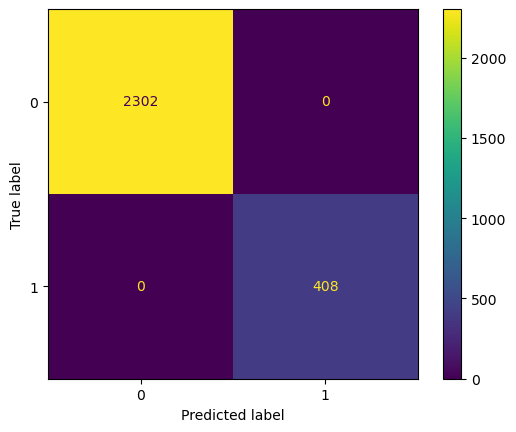

In [95]:
ConfusionMatrixDisplay(confusion_matrix(y_train, predicted)).plot()

In [96]:
print(classification_report(y_train, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2302
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2710
   macro avg       1.00      1.00      1.00      2710
weighted avg       1.00      1.00      1.00      2710



In [97]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
cross_val_score(tree, X_train, y_train, cv=cv, scoring='recall',)

array([0.28395062, 0.20987654, 0.36585366, 0.32926829, 0.32926829])

In [98]:
parameters = {"max_depth": np.arange(2, 25),}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#To use stratified K-fold cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

forest_grid = GridSearchCV(RandomForestClassifier(random_state=7), parameters, scoring=scorer, cv=5, n_jobs= -1).fit(X_train, y_train)

params = forest_grid.best_params_
params

{'max_depth': 20}

In [99]:
predicted_train_forest = forest_grid.predict(X_train)

In [100]:
print(classification_report(y_train, predicted_train_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2302
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2710
   macro avg       1.00      1.00      1.00      2710
weighted avg       1.00      1.00      1.00      2710



In [101]:
predicted_test_forest = forest_grid.predict(X_test)

In [102]:
print(classification_report(y_test, predicted_test_forest))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       576
           1       0.71      0.05      0.09       102

    accuracy                           0.85       678
   macro avg       0.78      0.52      0.51       678
weighted avg       0.83      0.85      0.80       678



## We compare the different models based on chosen metrics and then choose the best model that is most capable of making good predictions

In [103]:
print(classification_report(y_test, predicted_test_knn))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       576
           1       0.22      0.11      0.15       102

    accuracy                           0.81       678
   macro avg       0.54      0.52      0.52       678
weighted avg       0.76      0.81      0.78       678



In [104]:
print(classification_report(y_test, predicted_test_tree))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       576
           1       0.23      0.26      0.25       102

    accuracy                           0.76       678
   macro avg       0.55      0.55      0.55       678
weighted avg       0.77      0.76      0.76       678



In [105]:
print(classification_report(y_test, predicted_test_forest))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       576
           1       0.71      0.05      0.09       102

    accuracy                           0.85       678
   macro avg       0.78      0.52      0.51       678
weighted avg       0.83      0.85      0.80       678



In [106]:
# Also printing the earlier Logistic Regression scores
print(classification_report(y_test, y_pred_test_l))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       576
           1       0.30      0.54      0.38       102

    accuracy                           0.74       678
   macro avg       0.60      0.66      0.61       678
weighted avg       0.81      0.74      0.77       678



## Try Optimising the thresholds for each of the models using predict_proba (like we did for Logistic Regression)

## Still not satisified with the scores??

## We can try oversampling, SMOTE, ADASYN, other Ensembles, etc, etc and MORE....